<a href="https://colab.research.google.com/github/Parkseoho/DAStudy-sun2/blob/main/SEOHO/%EC%A0%9C%EC%A3%BC%EB%8F%84_%EB%82%B4%EA%B5%AD%EC%9D%B8_%EA%B4%80%EA%B4%91%EA%B0%9D_%EC%86%8C%EB%B9%84%ED%8C%A8%ED%84%B4_%EB%B6%84%EC%84%9D_seoho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


In [99]:
df = pd.read_csv('/content/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv',encoding='cp949')

In [100]:
df.head()

,기준년월,관광객 유형,제주 대분류,제주 중분류,업종명,성별,연령대별,카드이용금액,카드이용건수,건당이용금액,데이터기준일자
0,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,50대,14434000,67,215433,2017-02-16
1,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,50대,15119000,72,209986,2017-02-16
2,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,여,40대,7609500,41,185598,2017-02-16
3,2014-09,내국인 관광객,서귀포시,남원읍,농축수산품,남,50대,7092500,40,177313,2017-02-16
4,2014-09,내국인 관광객,서귀포시,대륜동,농축수산품,남,40대,9098500,59,154212,2017-02-16


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   관광객 유형    13146 non-null  object
 2   제주 대분류    13146 non-null  object
 3   제주 중분류    13146 non-null  object
 4   업종명       13146 non-null  object
 5   성별        13146 non-null  object
 6   연령대별      13146 non-null  object
 7    카드이용금액   13146 non-null  int64 
 8    카드이용건수   13146 non-null  int64 
 9   건당이용금액    13146 non-null  int64 
 10  데이터기준일자   13146 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
카드이용금액,13146.000,3697184.031,6232327.011,36100.000,595860.000,1533550.000,3863175.000,64277700.000
카드이용건수,13146.000,133.308,210.459,10.000,23.000,54.000,143.000,2574.000
건당이용금액,13146.000,35163.811,35421.702,3520.000,13939.250,21007.500,46235.750,539047.000


In [103]:
df.isnull().sum()

기준년월        0
관광객 유형      0
제주 대분류      0
제주 중분류      0
업종명         0
성별          0
연령대별        0
 카드이용금액     0
 카드이용건수     0
건당이용금액      0
데이터기준일자     0
dtype: int64

In [104]:
df.columns = df.columns.str.strip()

In [105]:
# 관광객 유형, 데이터기준일자는 nunique값 1개이므로 삭제

print(df.nunique())
df = df.drop(columns=['관광객 유형','데이터기준일자'])

기준년월          24
관광객 유형         1
제주 대분류         2
제주 중분류        10
업종명           14
성별             2
연령대별           4
카드이용금액     11947
카드이용건수       965
건당이용금액     11515
데이터기준일자        1
dtype: int64


In [106]:
df['년도'] = df['기준년월'].str.split('-',expand=True)[0]
df['월'] = df['기준년월'].str.split('-',expand=True)[1]

In [107]:
# 년도마다 수치가 다른 것은 2014년도는 9월부터 206년도는 1~8월까지 존재

df_year = df.groupby('년도')['기준년월'].count().reset_index()

In [108]:
# 월에 대한 기준은 다르지만 월 평균 방문 수치로 봤을 때 증가하는게 보임

df_year.loc[df_year['년도']=='2014','기준년월'] = df_year['기준년월'].astype(int) / 4
df_year.loc[df_year['년도']=='2015','기준년월'] = df_year['기준년월'].astype(int) / 12
df_year.loc[df_year['년도']=='2016','기준년월'] = df_year['기준년월'].astype(int) / 8

df_year

,년도,기준년월
0,2014,508.750
1,2015,541.250
2,2016,577.000


In [109]:
# 최근 2014 ~ 2016년도 카드이용금액은 증가하는 추세

df_year2 = df.groupby('년도')['카드이용금액'].sum().reset_index()
df_year2.loc[df_year2['년도']=='2014','카드이용금액'] = df_year2['카드이용금액']/ 4
df_year2.loc[df_year2['년도']=='2015','카드이용금액'] = df_year2['카드이용금액'] / 12
df_year2.loc[df_year2['년도']=='2016','카드이용금액'] = df_year2['카드이용금액'] / 8
df_year2['카드이용금액'].astype(int)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_year2

,년도,카드이용금액
0,2014,1654620232.750
1,2015,1981958015.083
2,2016,2275150520.250


In [110]:
df_year.loc[df_year['년도']=='2014','기준년월'] = df_year['기준년월'].astype(int) / 4
df_year.loc[df_year['년도']=='2015','기준년월'] = df_year['기준년월'].astype(int) / 12
df_year.loc[df_year['년도']=='2016','기준년월'] = df_year['기준년월'].astype(int) / 8
df_year

,년도,기준년월
0,2014,127.000
1,2015,45.083
2,2016,72.125


In [111]:
df_month = df.groupby(['년도','월'])['기준년월'].count().reset_index()

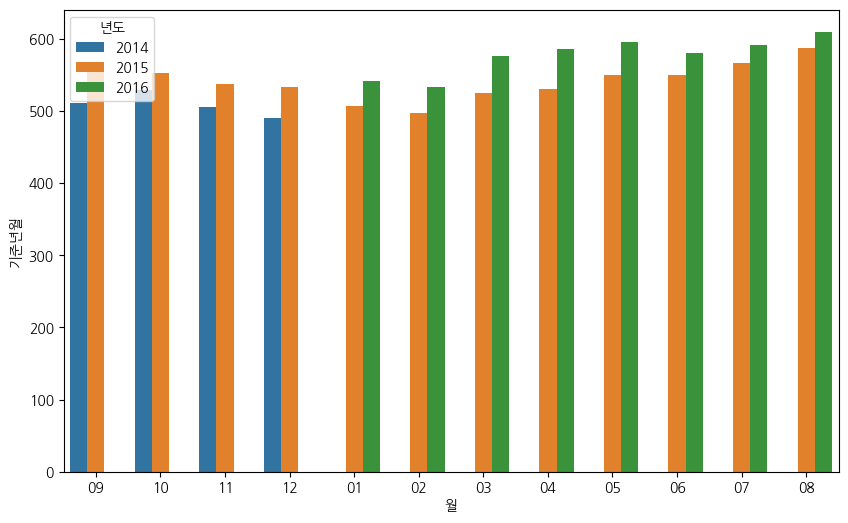

In [112]:
# 기준년도에 차이가 있지만 2014년도보다 2015년도가 2015년도보다 2016년도가 높은 방문객 많은 것을 확인

plt.figure(figsize=(10, 6))
sns.barplot(data=df_month, x= '월',y='기준년월',hue='년도')
plt.show()

In [113]:
df.groupby('년도')['카드이용금액'].sum().reset_index()

,년도,카드이용금액
0,2014,6618480931
1,2015,23783496181
2,2016,18201204162


In [114]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)>

In [115]:
# 제주도 방문객은 성별, 연령대별로 봤을 때 큰 차이가 없음

result = df.groupby('성별')['연령대별'].count().reset_index()
result.columns = ['성별', '성별_count']
result

,성별,성별_count
0,남,6609
1,여,6537


In [116]:
result = df.groupby('연령대별')['성별'].count().reset_index()
result.columns = ['연령대별', '연령대별_count']
result

,연령대별,연령대별_count
0,20대,3137
1,30대,3565
2,40대,3428
3,50대,3016


In [117]:
df[['성별','연령대별']].value_counts(normalize=True).reset_index()

,성별,연령대별,0
0,남,30대,0.136
1,여,30대,0.135
2,남,40대,0.135
3,여,20대,0.127
4,여,40대,0.126
5,남,50대,0.121
6,남,20대,0.112
7,여,50대,0.109


In [118]:
result = df.groupby(['성별', '연령대별']).agg({
    '카드이용금액': 'mean',
    '카드이용건수': 'sum',
    '건당이용금액': 'mean'
}).reset_index()
result

,성별,연령대별,카드이용금액,카드이용건수,건당이용금액
0,남,20대,2001758.323,148838,26542.739
1,남,30대,4290112.424,311959,34317.600
2,남,40대,4642238.514,278128,39775.258
3,남,50대,4348726.863,189380,43778.704
4,여,20대,2672282.078,221995,25301.101
5,여,30대,4043926.968,283488,32478.563
6,여,40대,3711311.892,192724,38201.320
7,여,50대,3551705.065,125956,41138.048


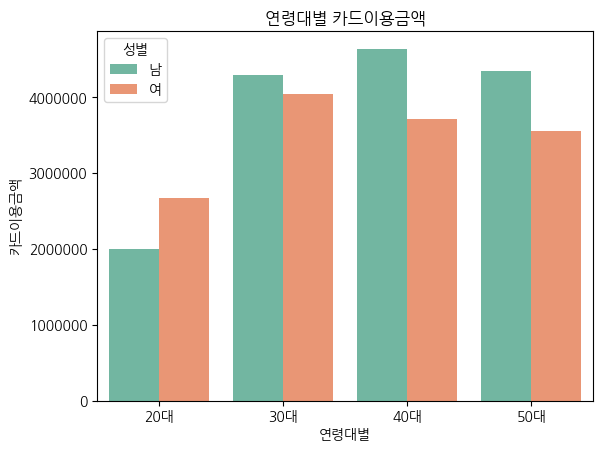

In [119]:
sns.barplot(x='연령대별', y='카드이용금액', hue='성별', data=result, palette="Set2")
plt.ticklabel_format(style='plain', axis='y')
plt.title('연령대별 카드이용금액')
plt.show()

## 50대의 건당이용금액은 제일 높으나 카드 이용금액이 40대보다 적은걸로 봐서는 고가의 필요한 물품을 살 것으로 예상, 반대로 30대의 경우 낮은 금액대를 여러개 살 것으로 판단

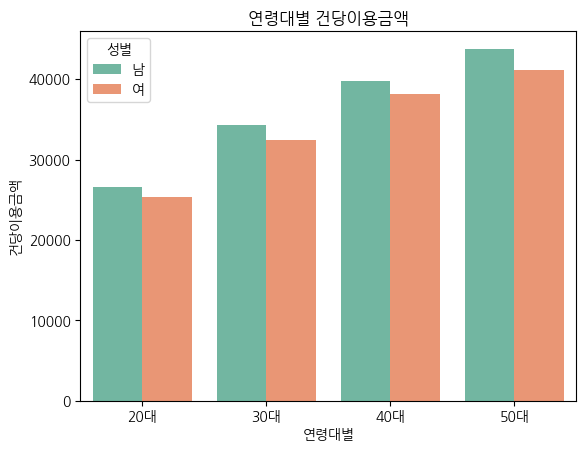

In [120]:
sns.barplot(x='연령대별', y='건당이용금액', hue='성별', data=result, palette="Set2")
plt.ticklabel_format(style='plain', axis='y')
plt.title('연령대별 건당이용금액')
plt.show()

In [121]:
result = df.groupby(['연령대별','업종명'])['카드이용금액'].sum().reset_index().sort_values('카드이용금액',ascending=False)\
.drop_duplicates('연령대별',keep='first')

result

,연령대별,업종명,카드이용금액
43,50대,농축수산품,4839790322
31,40대,슈퍼 마켓,3932559693
17,30대,슈퍼 마켓,3601002293
5,20대,스넥,1503180723


In [122]:
result = df.groupby(['성별','업종명'])['카드이용금액'].sum().reset_index().sort_values('카드이용금액',ascending=False)\
.drop_duplicates('성별',keep='first')

result

,성별,업종명,카드이용금액
3,남,농축수산품,7064962946
17,여,농축수산품,6027597440


In [123]:
result = df.groupby(['성별','연령대별','업종명'])['카드이용금액'].sum().reset_index().sort_values('카드이용금액',ascending=False)\
.drop_duplicates(['성별','연령대별'],keep='first')

result.sort_values(['연령대별','성별'])

,성별,연령대별,업종명,카드이용금액
3,남,20대,슈퍼 마켓,659222824
51,여,20대,기념품 점,916508700
15,남,30대,슈퍼 마켓,2081050701
66,여,30대,농축수산품,1559639675
28,남,40대,슈퍼 마켓,2320164948
80,여,40대,농축수산품,1631185189
40,남,50대,농축수산품,2688080931
93,여,50대,농축수산품,2151709391


In [139]:
df.업종명.nunique()

14

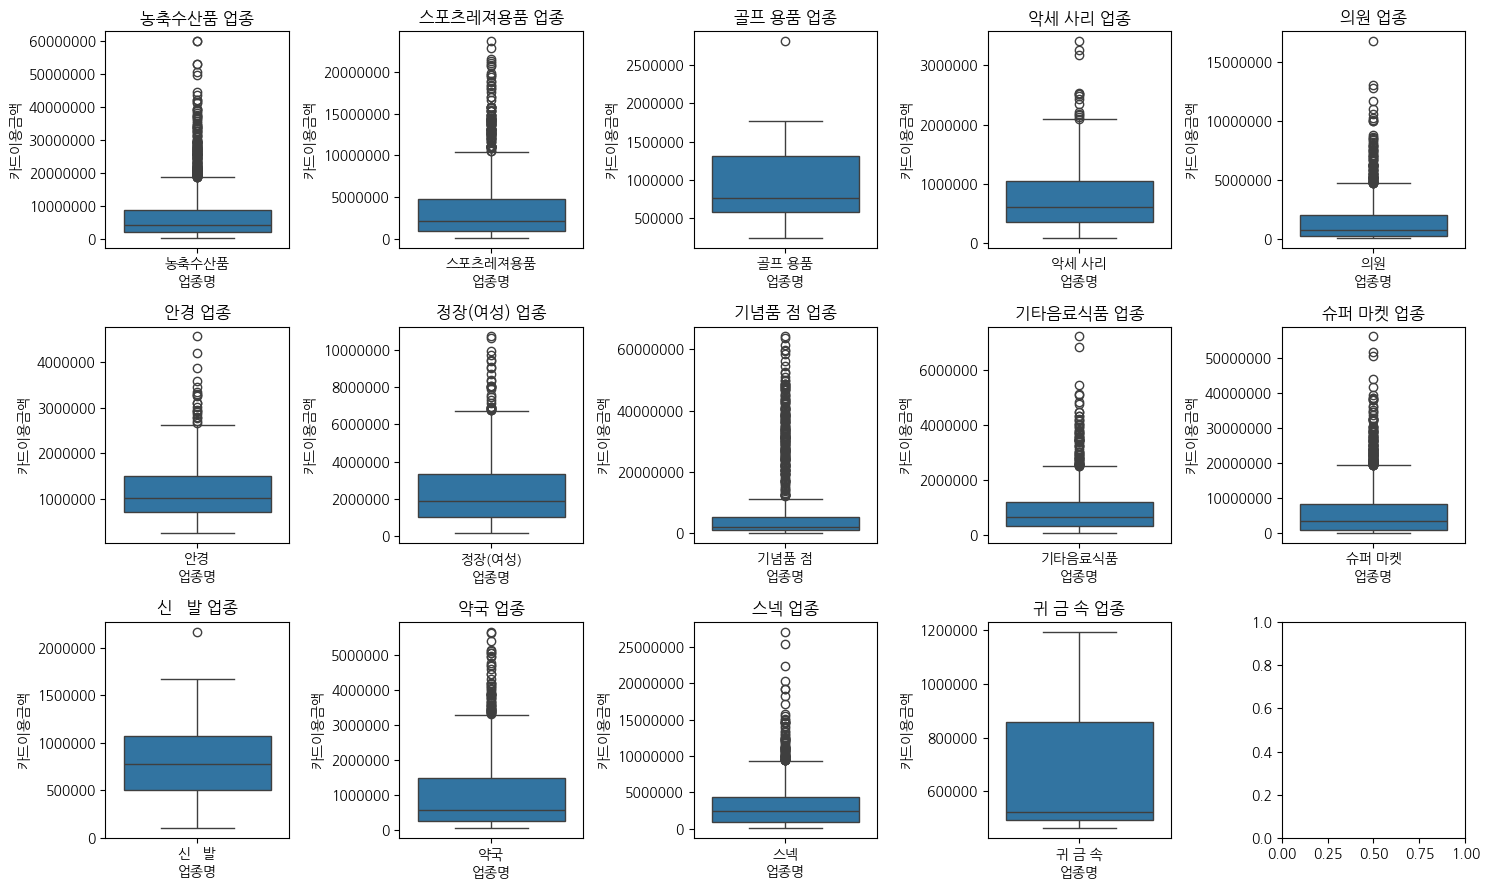

In [151]:
unique_industries = df['업종명'].unique()

fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for idx, industry in enumerate(unique_industries):
    row, col = divmod(idx, 5)
    sns.boxplot(data=df[df['업종명'] == industry], x='업종명', y='카드이용금액', ax=axes[row, col])
    axes[row, col].set_title(f'{industry} 업종')
    axes[row, col].yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

<ipython-input-124-031bc59d62f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =df_month_price,x='월',y='카드이용금액', palette="Set2")


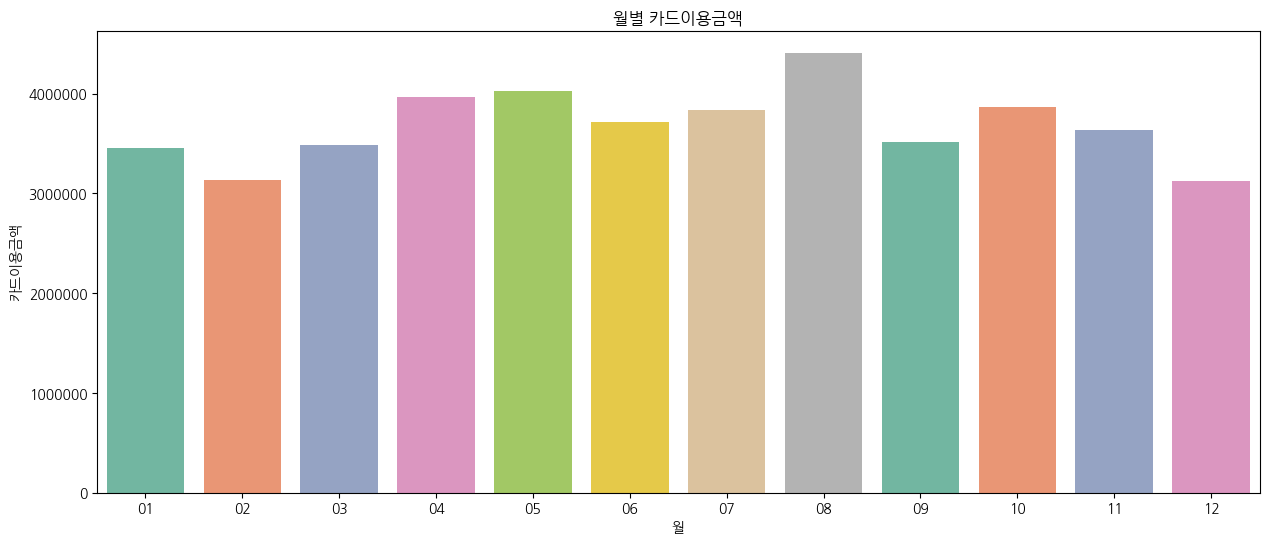

In [124]:
ㅊdf_month_price = df.groupby(['월'])['카드이용금액'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data =df_month_price,x='월',y='카드이용금액', palette="Set2")
plt.ticklabel_format(style='plain', axis='y')
plt.title('월별 카드이용금액')
plt.show()

<Axes: xlabel='월', ylabel='0'>

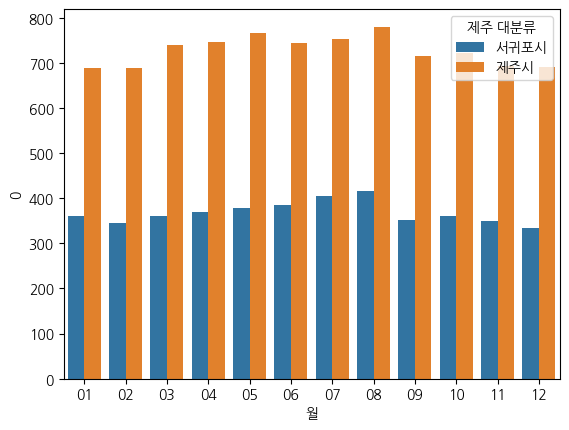

In [125]:
# 전반적으로 결제가 이뤄지는 장소는 서귀포보다는 제주시

sns.barplot(data = df[['월','제주 대분류']].value_counts().reset_index().sort_values('월'),x='월',y=0,hue='제주 대분류')

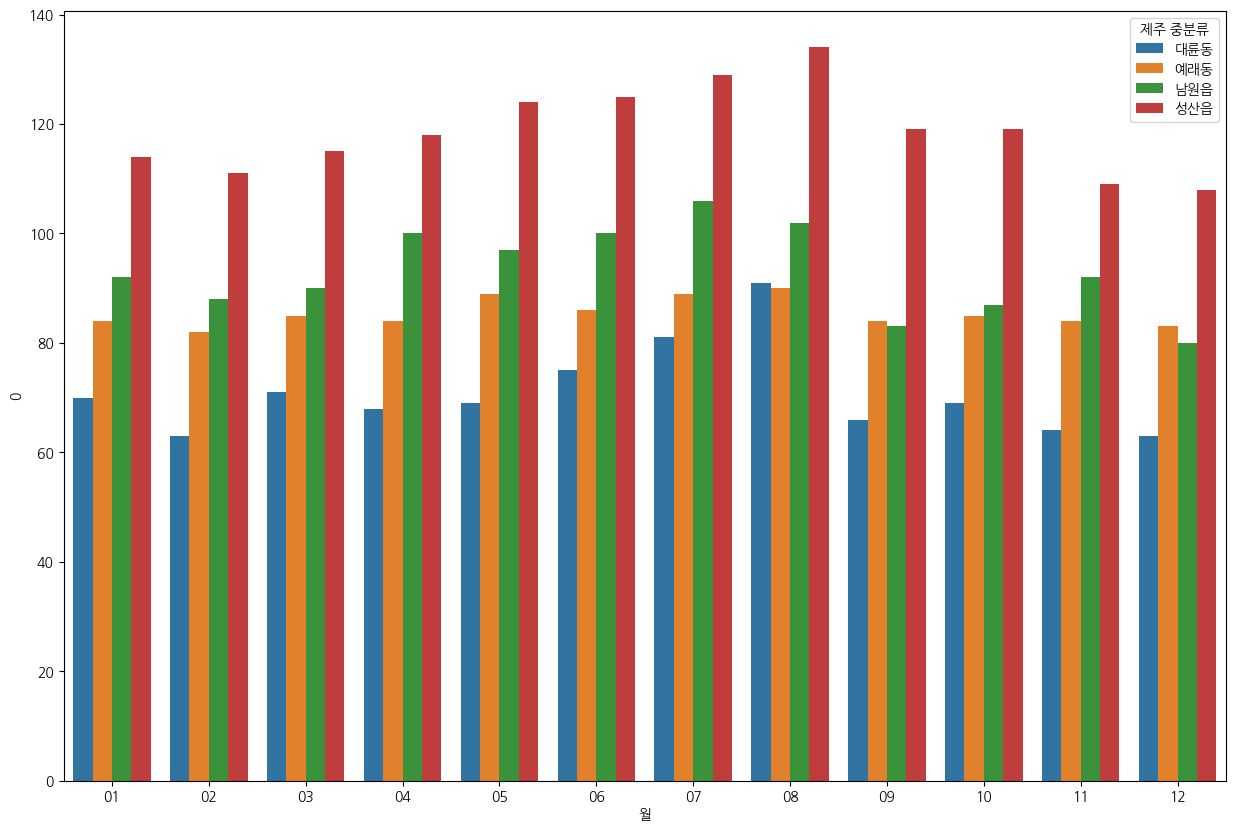

In [126]:
# 월 상관없이 대륜동 -> 예래동 -> 남원읍 -> 성산읍 순으로 많음

plt.figure(figsize=(15,10))


sns.barplot(data = df[df['제주 대분류']=='서귀포시'][['월','제주 중분류']].value_counts().reset_index().sort_values(['월',0]),
            x = '월',y=0,hue = '제주 중분류')
plt.show()

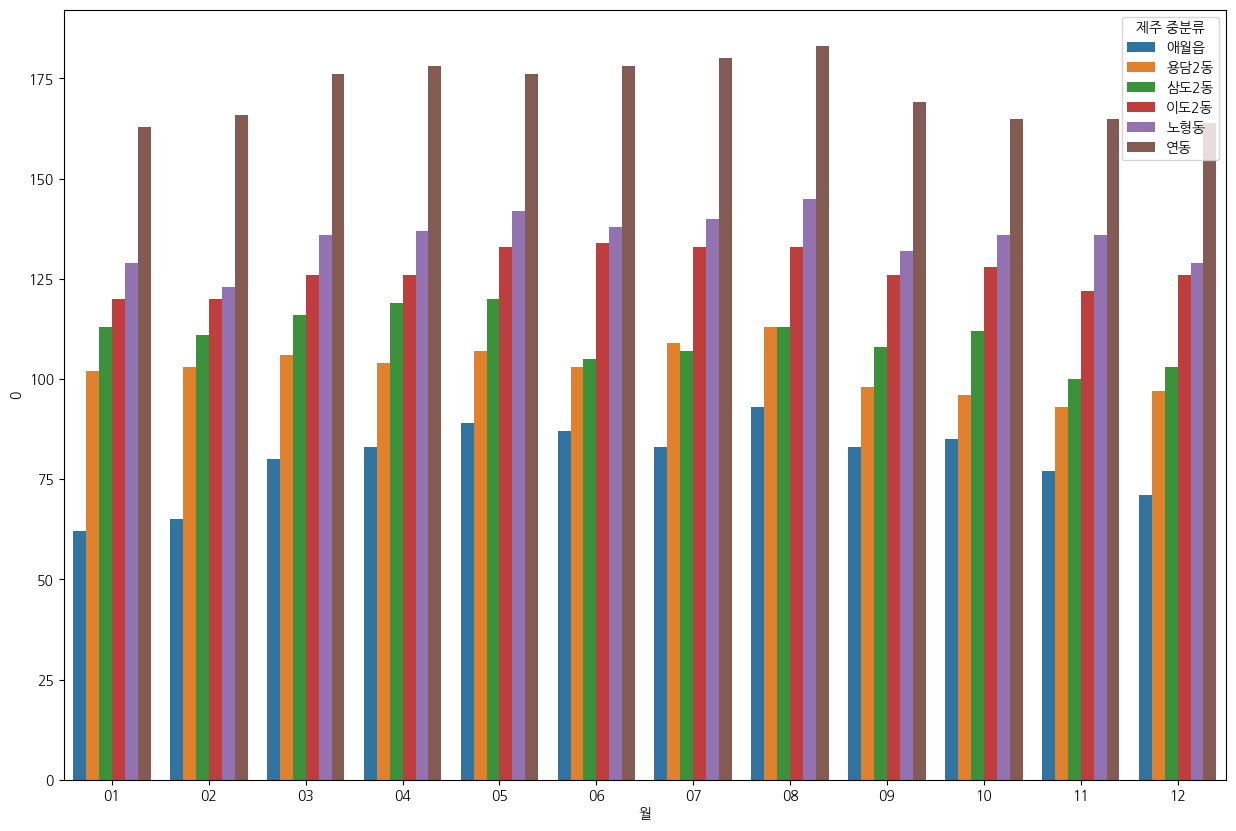

In [127]:
# 월 상관없이 대륜동 -> 예래동 -> 남원읍 -> 성산읍 순으로 많음

plt.figure(figsize=(15,10))


sns.barplot(data = df[df['제주 대분류']=='제주시'][['월','제주 중분류']].value_counts().reset_index().sort_values(['월',0]),
            x = '월',y=0,hue = '제주 중분류')
plt.show()

<ipython-input-128-f44bfdd2676c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(result,x='업종명',y='카드이용건수', palette="Set2")


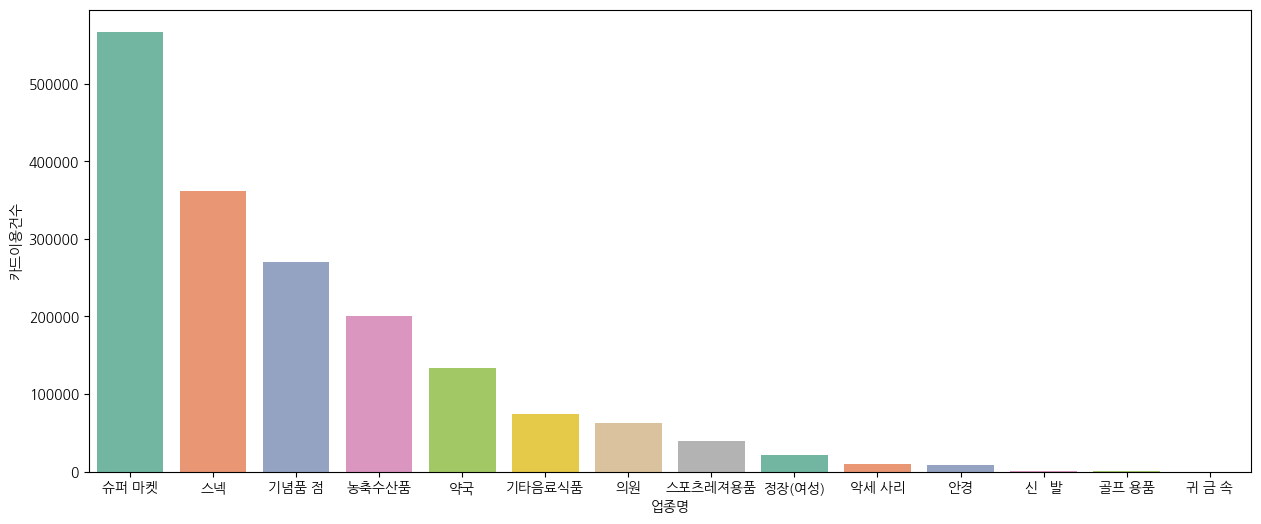

In [128]:
result = df.groupby('업종명')['카드이용건수'].sum().reset_index()
result = result.sort_values('카드이용건수',ascending=False)
plt.figure(figsize=(15, 6))

sns.barplot(result,x='업종명',y='카드이용건수', palette="Set2")
plt.show()

<ipython-input-129-a506ba539e85>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=result, x='업종명', y='카드이용금액', palette="Set2")


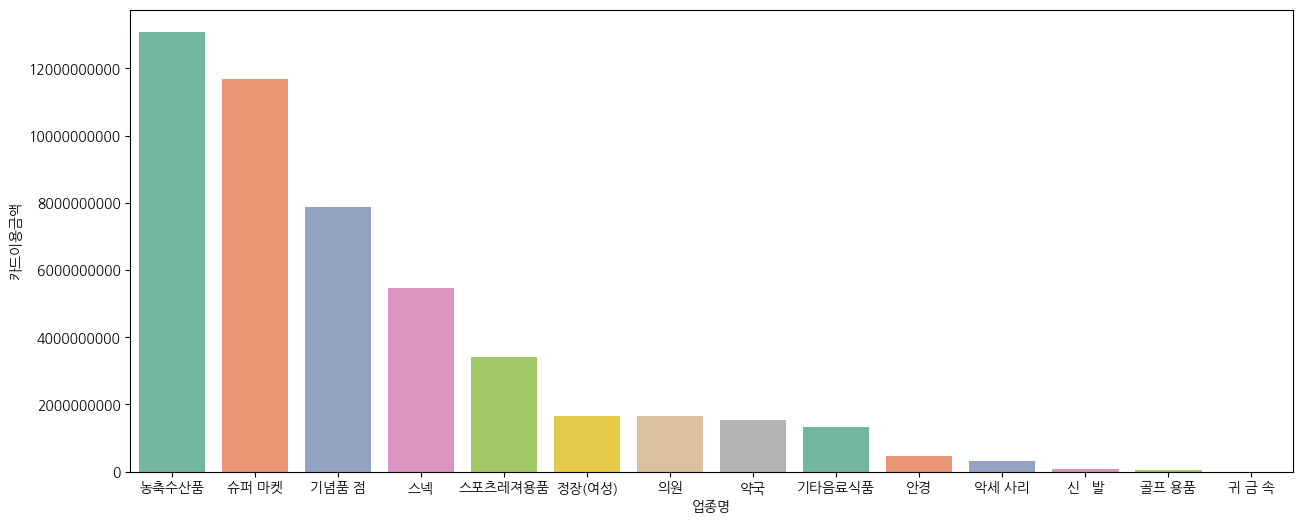

In [129]:
from matplotlib.ticker import ScalarFormatter
result = df.groupby('업종명')['카드이용금액'].sum().reset_index()
result
result = result.sort_values(('카드이용금액'), ascending=False)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=result, x='업종명', y='카드이용금액', palette="Set2")

ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


<ipython-input-130-e511e30da18a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=result, x='업종명', y='건당이용금액', palette="Set2")


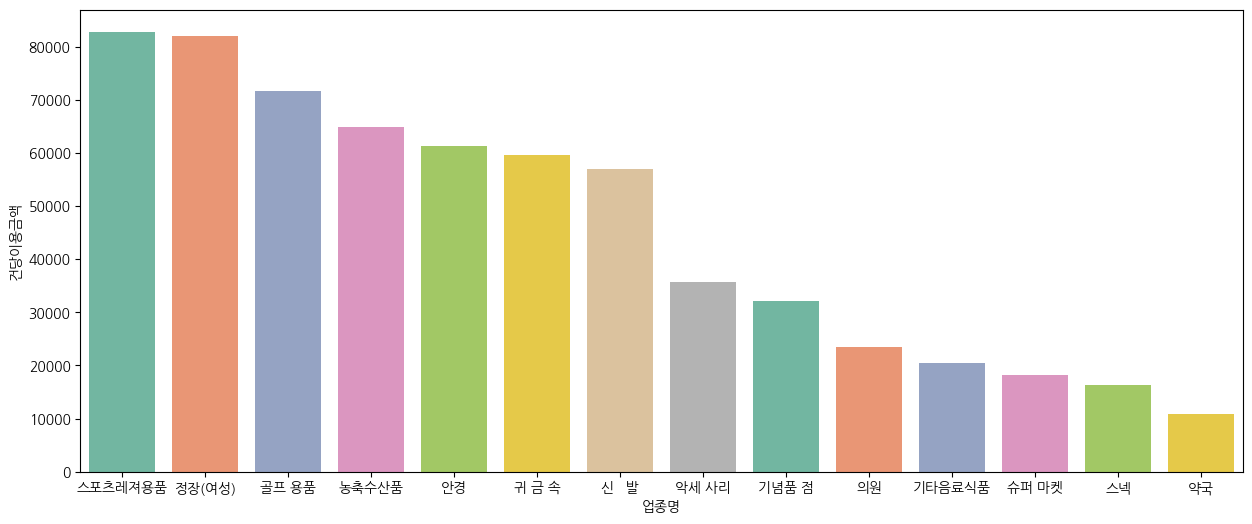

In [130]:
from matplotlib.ticker import ScalarFormatter
result = df.groupby('업종명')['건당이용금액'].mean().reset_index()
result
result = result.sort_values(('건당이용금액'), ascending=False)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=result, x='업종명', y='건당이용금액', palette="Set2")

# x축 눈금을 직접 설정하여 scientific notation 비활성화
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


## 가설
### 1. 스포츠레저용품, 골프 용품같은 경우 이용건수, 총구매금액은 낮은 수준 그러나 1회 평균 구매금액은 높음 이는 제주도에서 스포츠나 골프를 하러오는 사람들이 일반 관광객에 비해 현저히 낮음

### 2. 스포츠레저용품, 골프같은 경우는 미리 준비를 하고 가기 때문에 즐기러 오는 사람들이 꽤 많이 있으나 현지에서 물품을 구매하는 경우는 거의 없을 것이다